In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC

# Different matrices to score model performance
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# Read in data and display first 5 rows
features = pd.read_csv('Dataset_after_Bayesian_MXM.csv')
features.head(5)

,MH_05,MH_15A,MH_15C,MH_15D,MH_15F,LM_30,LM_40,BH_35A,BH_35B,BH_35E,BH_40A,BH_40D,BH_40F,AGEGRP,SEX,MARSTATC,PEMPSTC,PFSCDV
0,1,1,1,1,1,5,4,1,3,2,3,3,1,3,1,4,1,0
1,3,4,3,2,4,6,3,4,4,4,3,1,1,4,1,1,4,0
2,3,2,1,2,2,6,4,3,4,4,3,3,3,7,2,3,4,0
3,2,2,1,2,2,5,4,1,4,4,3,1,3,3,1,3,1,0
4,2,1,1,1,1,4,3,1,4,2,3,2,1,3,1,4,1,0


In [3]:
features = features.replace([9], 2)
features["MH_05"].replace({2: 1, 3: 2, 4: 3, 5: 4}, inplace=True)

In [4]:
print('The shape of our features is:', features.shape)

The shape of our features is: (4600, 18)


In [5]:
# Descriptive statistics for each column
features.describe()

,MH_05,MH_15A,MH_15C,MH_15D,MH_15F,LM_30,LM_40,BH_35A,BH_35B,BH_35E,BH_40A,BH_40D,BH_40F,AGEGRP,SEX,MARSTATC,PEMPSTC,PFSCDV
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,1.720435,1.824783,1.712826,1.753261,1.786087,4.754348,3.424130,2.030435,3.446087,3.471957,2.540217,2.212609,1.686522,4.235435,1.540000,2.093913,2.407391,0.266522
std,0.858869,0.888277,0.858003,0.884127,0.873309,1.401581,1.093132,1.113844,1.016993,0.783387,0.781188,0.904444,0.935163,1.653242,0.498452,1.240702,1.425893,0.693718
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,4.000000,1.000000,4.000000,4.000000,3.000000,3.000000,1.000000,4.000000,2.000000,1.000000,2.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,6.000000,2.000000,3.000000,4.000000,0.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000,5.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,7.000000,2.000000,4.000000,4.000000,3.000000


In [6]:
# One Hot Encoding
features = pd.get_dummies(features)

In [7]:
# Labels are the values we want to predict
labels = features['MH_05']
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('MH_05', axis = 1)

In [8]:
# Over-sampling the minority class
from imblearn.over_sampling import SMOTE
features, labels = SMOTE().fit_resample(features, labels)
labels.value_counts().to_frame().T

,1,2,3,4
MH_05,2346,2346,2346,2346


In [9]:
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
labels = np.array(labels)
features = np.array(features)

In [10]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7507, 17)
Training Labels Shape: (7507,)
Testing Features Shape: (1877, 17)
Testing Labels Shape: (1877,)


In [11]:
#training SVM model with linear kernel
model = SVC(kernel='linear', random_state = 42)
model.fit(train_features, train_labels)
#predicting output for test data
predictions = model.predict(test_features)

In [12]:
# Model Accuracy: how often is the classifier correct?

predictions = model.predict(test_features)
true_values = test_labels # True values
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.54 degrees.


In [13]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 71.91 %.



Test confusion_matrix


Text(33.0, 0.5, 'True')

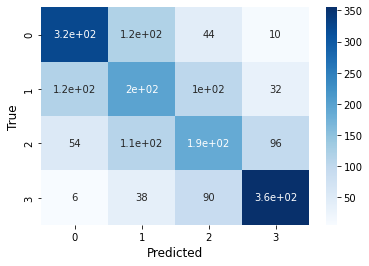

In [14]:
# To evaluate the performance, use confusion matrix
cf_matrix = confusion_matrix(test_labels, predictions)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

MH_15A      0.623006
MH_15C      0.303829
MH_15D      0.251618
MH_15F      0.277575
LM_30       0.060235
LM_40       0.053396
BH_35A      0.101709
BH_35B      0.058467
BH_35E      0.002241
BH_40A      0.102129
BH_40D      0.276667
BH_40F      0.046431
AGEGRP      0.175935
SEX         0.085325
MARSTATC    0.024066
PEMPSTC     0.131235
PFSCDV      0.057840
dtype: float64


<AxesSubplot:>

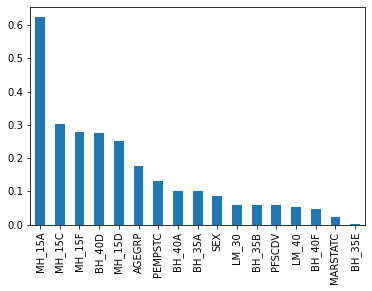

In [15]:
#Plotting the feature importance 
features_name = ['MH_15A', 'MH_15C', 'MH_15D', 'MH_15F', 'LM_30', 'LM_40', 'BH_35A', 'BH_35B', 'BH_35E', 'BH_40A', 'BH_40D', 'BH_40F', 'AGEGRP', 'SEX', 'MARSTATC', 'PEMPSTC', 'PFSCDV']
%matplotlib inline
feature_importances = pd.Series(abs(model.coef_[0]), index=features_name)
print(feature_importances)
feature_importances.nlargest(17).plot.bar(orientation = 'vertical')

In [16]:
#Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=test_features, columns=features_name)
TestingDataResults['Perceived MH']=test_labels
TestingDataResults['Predicted MH']=predictions
TestingDataResults.head(20)

,MH_15A,MH_15C,MH_15D,MH_15F,LM_30,LM_40,BH_35A,BH_35B,BH_35E,BH_40A,BH_40D,BH_40F,AGEGRP,SEX,MARSTATC,PEMPSTC,PFSCDV,Perceived MH,Predicted MH
0,1,1,1,1,6,3,1,1,4,2,3,1,5,2,1,4,0,3,1
1,4,4,2,3,6,4,1,3,3,3,3,1,2,2,4,4,2,4,4
2,2,2,1,2,6,2,1,4,4,3,1,1,1,1,4,4,0,3,3
3,2,2,2,2,6,5,1,4,3,2,3,1,7,1,1,4,0,2,2
4,2,2,2,2,3,4,1,4,4,1,1,1,3,2,1,1,0,3,2
5,2,3,2,3,3,3,3,4,2,3,1,3,2,1,4,1,1,3,4
6,2,2,1,2,6,3,1,3,4,2,1,1,3,2,4,4,0,1,3
7,2,2,1,1,6,2,1,1,4,3,3,1,6,2,1,4,0,1,2
8,2,2,2,1,3,4,1,4,3,3,3,1,2,2,4,2,0,4,2
9,4,4,4,1,6,2,1,2,4,2,3,1,5,2,1,4,0,3,2
